In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('./College_data.csv', index_col=0)

In [10]:
df.sample(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Wilkes University,Yes,1631,1431,434,15,36,1803,603,11150,5130,550,1260,78,92,13.3,24,8543,67
Jersey City State College,No,2957,1423,691,10,30,3817,1394,3946,4800,400,1500,63,67,14.9,10,8367,26
College of St. Scholastica,Yes,672,596,278,29,60,1350,275,11844,3696,450,1146,54,76,11.6,33,8996,72
Westminster College,Yes,996,866,377,29,58,1411,72,12065,3615,430,685,62,78,12.5,41,8596,80
Arizona State University Main campus,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Johns Hopkins University,Yes,8474,3446,911,75,94,3566,1569,18800,6740,500,1040,96,97,3.3,38,56233,90
SUNY College at Plattsburgh,No,5549,3583,853,9,40,5004,475,6550,4176,600,1380,80,90,17.9,16,6174,65
Bluefield College,Yes,377,358,181,15,30,653,129,7150,4350,450,1500,61,67,17.8,3,6259,53
North Adams State College,No,1563,1005,240,1,19,1380,136,5542,4330,500,1000,65,71,14.2,17,6562,57
San Diego State University,No,9402,7020,2151,20,70,16407,5550,8384,5110,612,2400,87,93,19.5,7,7930,41


In [11]:
df.shape

(777, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


# Visualize

In [13]:
import seaborn as sns 


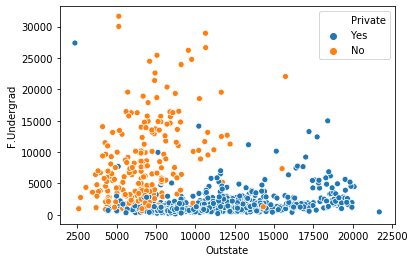

In [14]:
sns.scatterplot('Outstate','F.Undergrad',data=df, hue='Private')

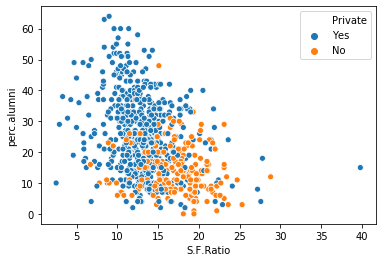

In [15]:
sns.scatterplot('S.F.Ratio','perc.alumni',data=df, hue='Private')

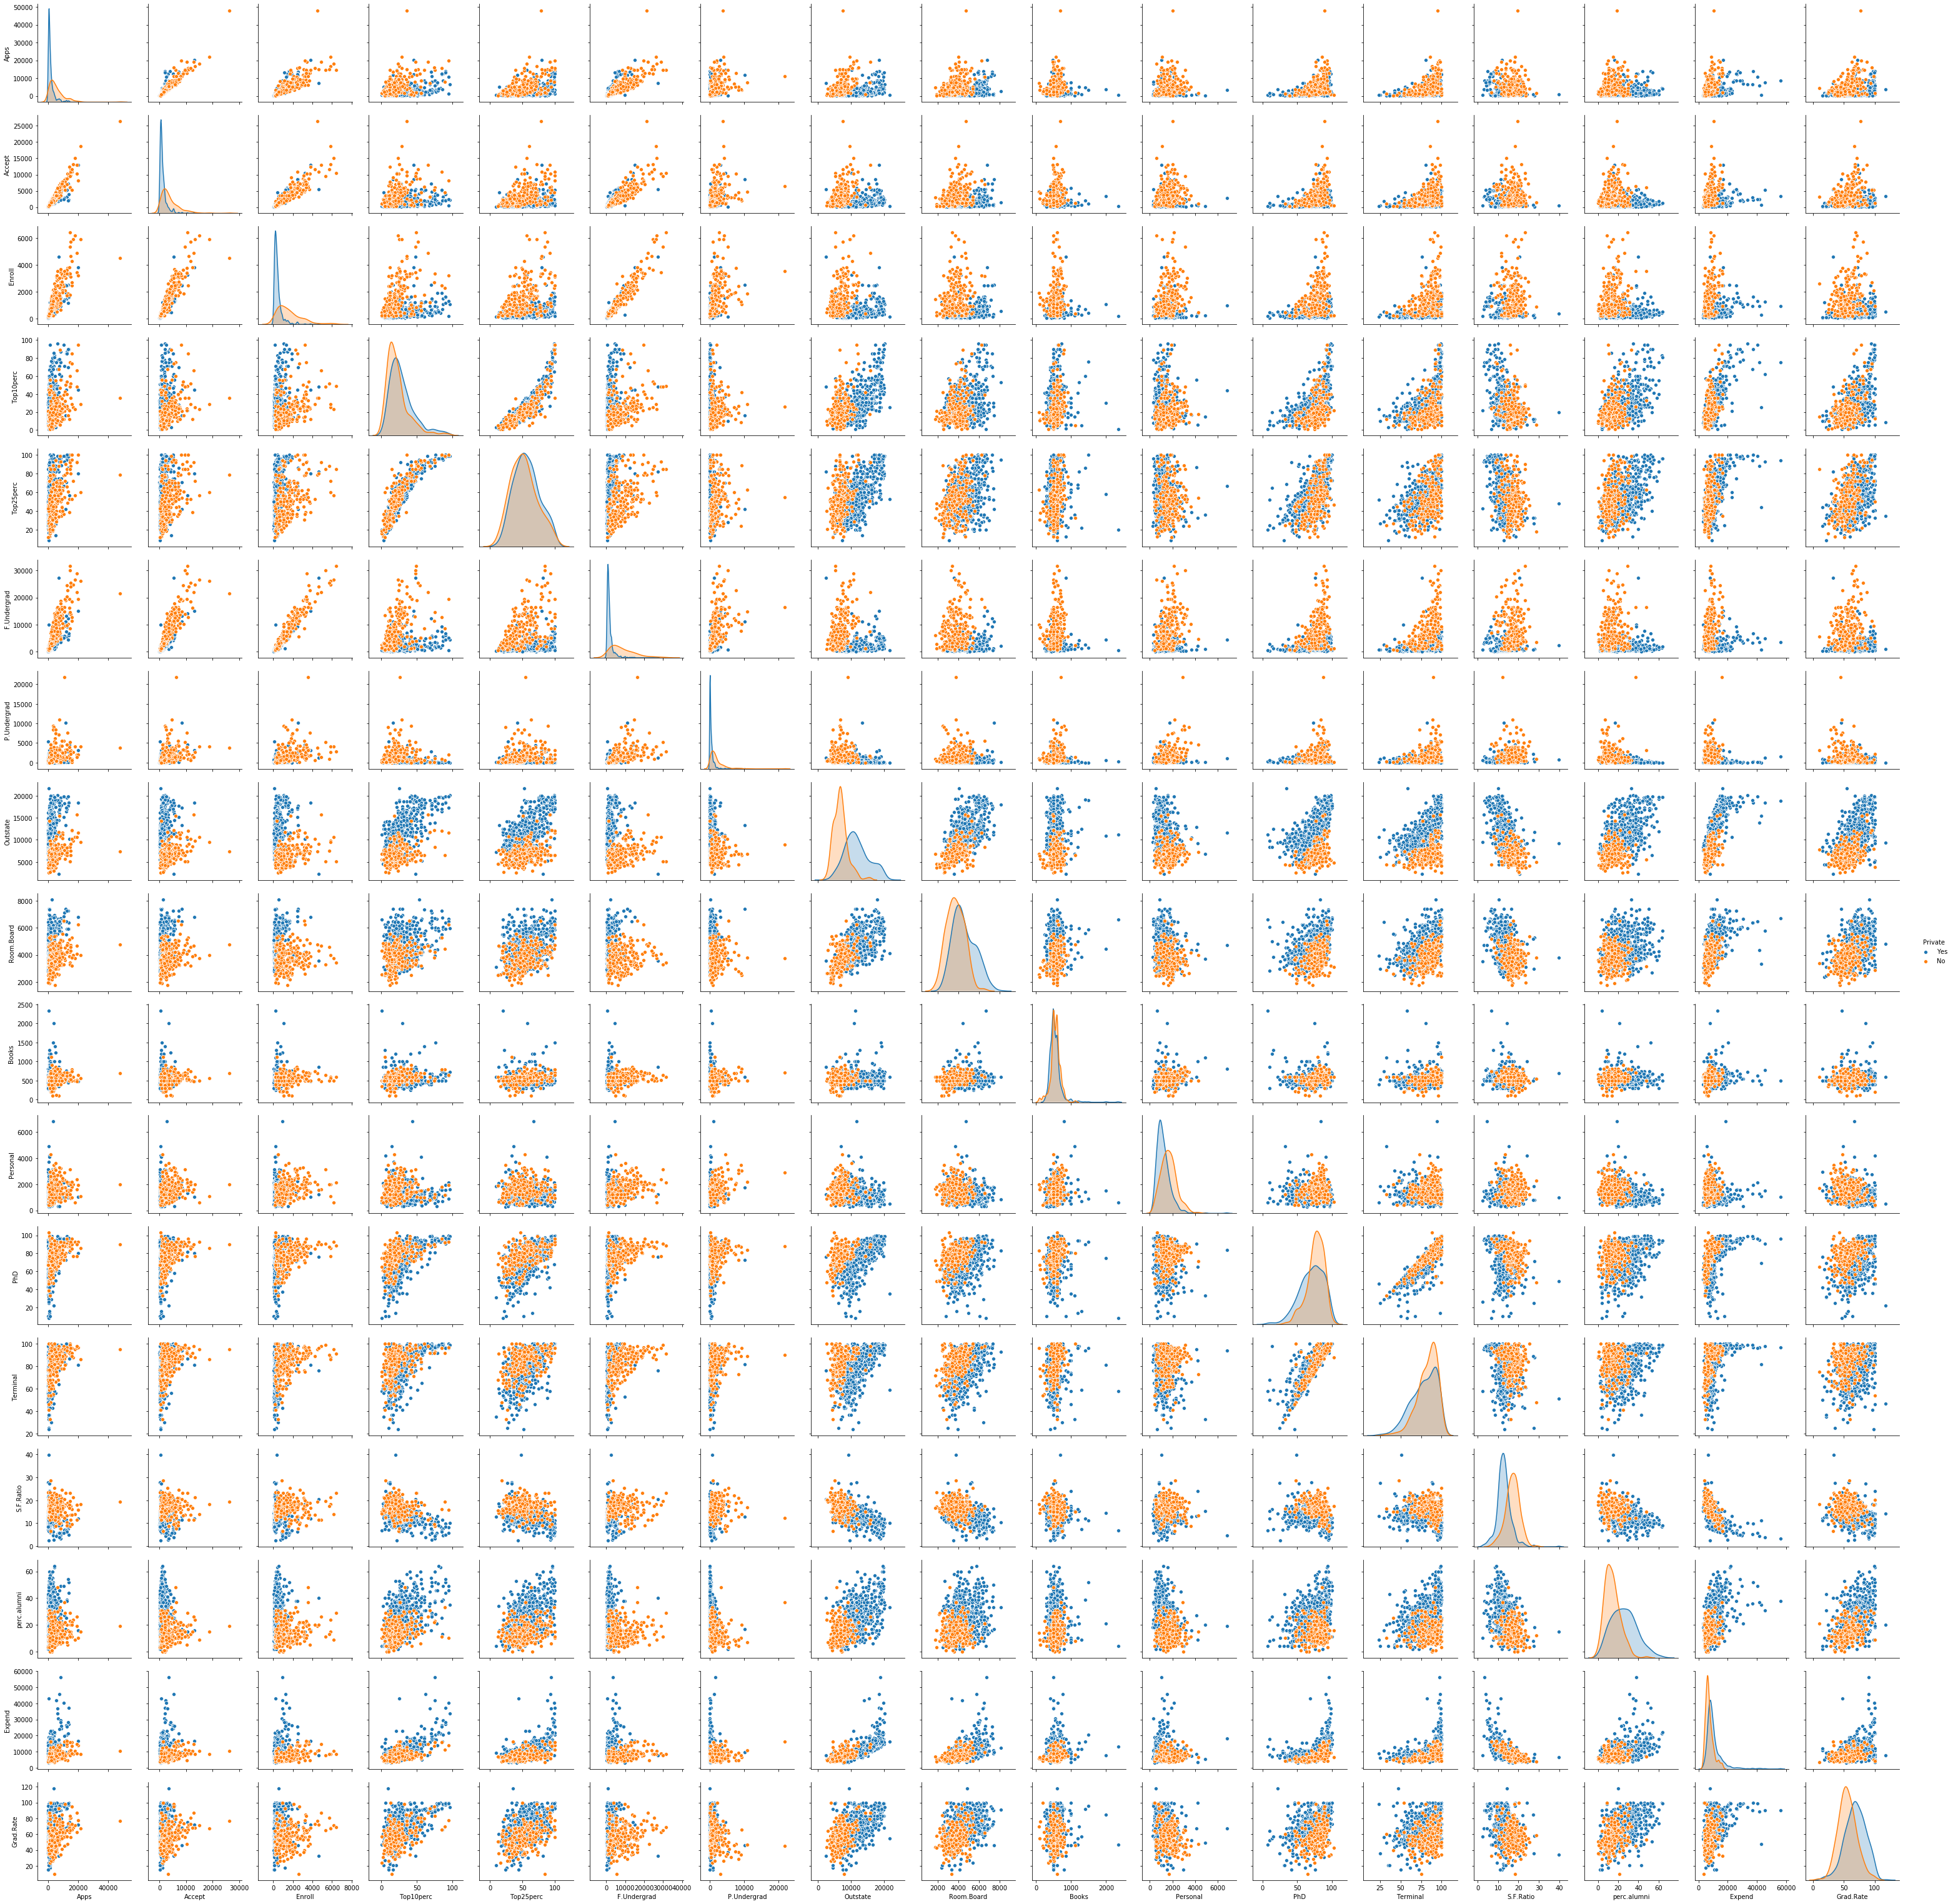

In [16]:
sns.pairplot(data=df, hue='Private')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 135.3+ KB


In [18]:
X=df[['Outstate', 'Room.Board', 'perc.alumni']]

# KMN

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.cluster_centers_


array([[14781.91197183,  5179.95422535,    30.17605634],
       [ 7939.831643  ,  3883.75456389,    18.46247465]])

In [20]:
transform={'Yes':1,
          'No':0}
df['labels']= df['Private'].map(transform)

In [21]:
df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,labels
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [22]:
print(df['Private'].value_counts())
print(df['labels'].value_counts())

Yes    565
No     212
Name: Private, dtype: int64
1    565
0    212
Name: labels, dtype: int64


In [23]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
confusion_matrix(df['labels'], kmeans.labels_)

array([[  8, 204],
       [276, 289]])

In [26]:
print(classification_report(df['labels'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.03      0.04      0.03       212
           1       0.59      0.51      0.55       565

    accuracy                           0.38       777
   macro avg       0.31      0.27      0.29       777
weighted avg       0.43      0.38      0.41       777



0.22136422136422138

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, df['labels'], test_size=0.3)

In [33]:
for n in range (3,11, 2):
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    print ('For n=', n)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print('******************************')      
          
          
    
    

For n= 3
[[ 41  25]
 [ 22 146]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        66
           1       0.85      0.87      0.86       168

    accuracy                           0.80       234
   macro avg       0.75      0.75      0.75       234
weighted avg       0.80      0.80      0.80       234

******************************
For n= 5
[[ 45  21]
 [ 20 148]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        66
           1       0.88      0.88      0.88       168

    accuracy                           0.82       234
   macro avg       0.78      0.78      0.78       234
weighted avg       0.82      0.82      0.82       234

******************************
For n= 7
[[ 45  21]
 [ 22 146]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        66
           1       0.87      0.87      0.87       168

    accuracy            

# KNN with all variables

In [36]:
X_all=df.drop(['labels','Private'], axis=1)
Y_all=df.labels

In [37]:
X_train_all, X_test_all, y_train_all, y_test_all= train_test_split(X_all, Y_all, test_size=0.3)


In [38]:
for n in range (3,11, 2):
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_all, y_train_all)
    y_pred=knn.predict(X_test_all)
    print ('For n=', n)
    print(confusion_matrix(y_test_all, y_pred))
    print(classification_report(y_test_all,y_pred))
    print('******************************')  

For n= 3
[[ 53  11]
 [  8 162]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        64
           1       0.94      0.95      0.94       170

    accuracy                           0.92       234
   macro avg       0.90      0.89      0.90       234
weighted avg       0.92      0.92      0.92       234

******************************
For n= 5
[[ 54  10]
 [  4 166]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        64
           1       0.94      0.98      0.96       170

    accuracy                           0.94       234
   macro avg       0.94      0.91      0.92       234
weighted avg       0.94      0.94      0.94       234

******************************
For n= 7
[[ 54  10]
 [  3 167]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        64
           1       0.94      0.98      0.96       170

    accuracy            